<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,23.632717,1.112655,34.745372,33.736845,1.008527
1,0.0,1.0,20.799732,0.885117,31.684849,30.919573,0.765276
2,0.0,2.0,24.304224,0.696459,35.000683,34.404627,0.596056
3,0.0,3.0,90.751100,-1.680082,99.071018,100.482956,-1.411939
4,0.0,4.0,58.550978,-3.439391,65.111587,68.461432,-3.349845
...,...,...,...,...,...,...,...
119995,999.0,115.0,88.702432,0.941333,99.643766,98.460975,1.182791
119996,999.0,116.0,63.986265,-0.276159,73.710106,73.929905,-0.219799
119997,999.0,117.0,21.545657,-2.208793,29.336864,31.807133,-2.470269
119998,999.0,118.0,94.233319,-0.890975,103.342345,103.950441,-0.608096


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    23.632717  1.112655   34.745372   33.736845  1.008527
      1.0    20.799732  0.885117   31.684849   30.919573  0.765276
      2.0    24.304224  0.696459   35.000683   34.404627  0.596056
      3.0    90.751100 -1.680082   99.071018  100.482956 -1.411939
      4.0    58.550978 -3.439391   65.111587   68.461432 -3.349845
...                ...       ...         ...         ...       ...
999.0 115.0  88.702432  0.941333   99.643766   98.460975  1.182791
      116.0  63.986265 -0.276159   73.710106   73.929905 -0.219799
      117.0  21.545657 -2.208793   29.336864   31.807133 -2.470269
      118.0  94.233319 -0.890975  103.342345  103.950441 -0.608096
      119.0  20.362320  0.650566   31.012885   30.632657  0.380228

[120000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    23.632717  1.112655   34.745372   33.736845  1.008527
      1.0    20.799732  0.885117   31.684849   30.919573  0.765276
      2.0    24.304224  0.696459   35.000683   34.404627  0.596056
      3.0    90.751100 -1.680082   99.071018  100.482956 -1.411939
      4.0    58.550978 -3.439391   65.111587   68.461432 -3.349845
...                ...       ...         ...         ...       ...
999.0 115.0  88.702432  0.941333   99.643766   98.460975  1.182791
      116.0  63.986265 -0.276159   73.710106   73.929905 -0.219799
      117.0  21.545657 -2.208793   29.336864   31.807133 -2.470269
      118.0  94.233319 -0.890975  103.342345  103.950441 -0.608096
      119.0  20.362320  0.650566   31.012885   30.632657  0.380228

[120000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,23.632717,1.112655,34.745372,33.736845,1.008527
1,0.0,1.0,20.799732,0.885117,31.684849,30.919573,0.765276
2,0.0,2.0,24.304224,0.696459,35.000683,34.404627,0.596056
3,0.0,3.0,90.751100,-1.680082,99.071018,100.482956,-1.411939
4,0.0,4.0,58.550978,-3.439391,65.111587,68.461432,-3.349845
...,...,...,...,...,...,...,...
119995,999.0,115.0,88.702432,0.941333,99.643766,98.460975,1.182791
119996,999.0,116.0,63.986265,-0.276159,73.710106,73.929905,-0.219799
119997,999.0,117.0,21.545657,-2.208793,29.336864,31.807133,-2.470269
119998,999.0,118.0,94.233319,-0.890975,103.342345,103.950441,-0.608096


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    23.632717  1.112655   34.745372   33.736845  1.008527
      1.0    20.799732  0.885117   31.684849   30.919573  0.765276
      2.0    24.304224  0.696459   35.000683   34.404627  0.596056
      3.0    90.751100 -1.680082   99.071018  100.482956 -1.411939
      4.0    58.550978 -3.439391   65.111587   68.461432 -3.349845
...                ...       ...         ...         ...       ...
999.0 115.0  88.702432  0.941333   99.643766   98.460975  1.182791
      116.0  63.986265 -0.276159   73.710106   73.929905 -0.219799
      117.0  21.545657 -2.208793   29.336864   31.807133 -2.470269
      118.0  94.233319 -0.890975  103.342345  103.950441 -0.608096
      119.0  20.362320  0.650566   31.012885   30.632657  0.380228

[120000 rows x 5 columns]

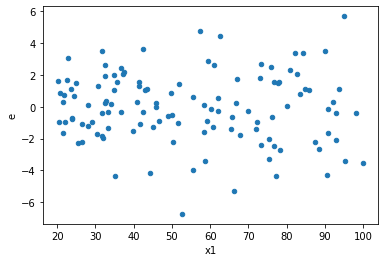

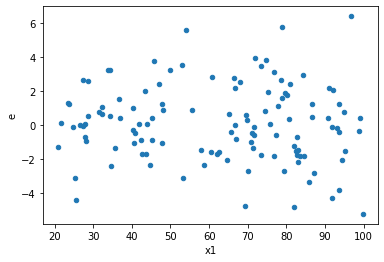

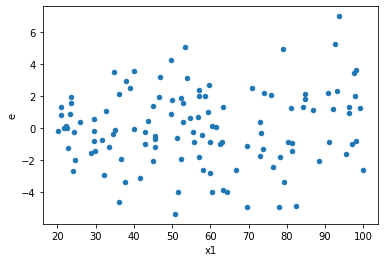

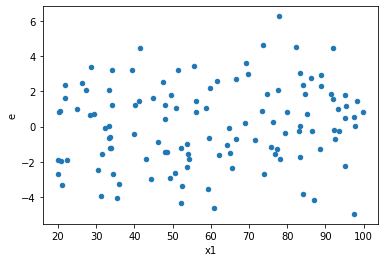

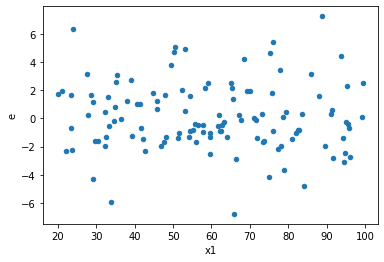

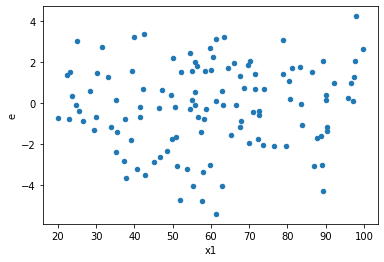

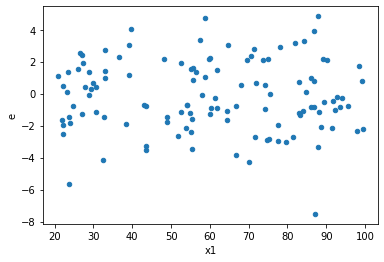

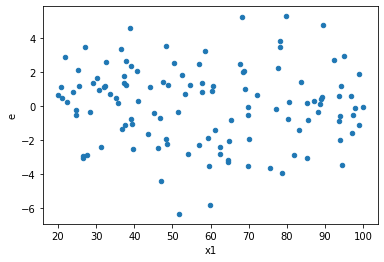

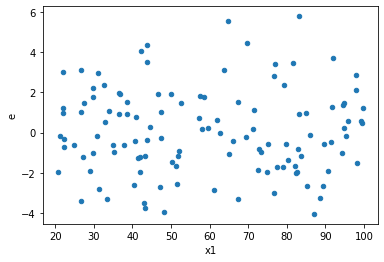

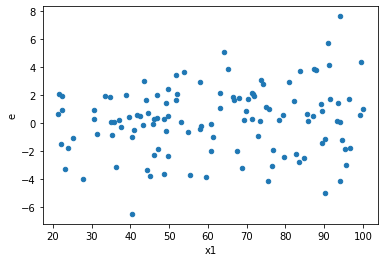

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,61.0,57.0,211.59827057775186,351.04422025485246,3.4688241078319977,6.158670530786885,1.7754346543203747,0.030043878285468173,0.9849780608572659,0.015021939142734086,Reject001=1 : Homoscedasticity
1.0,48.0,70.0,181.98185950739247,398.75879382260035,3.791288739737343,5.696554197465719,1.502537682703737,0.11864332305936887,0.9406783384703156,0.05932166152968443,Reject001=1 : Homoscedasticity
3.0,62.0,56.0,307.3227839806489,308.2240654100415,4.9568190964620795,5.504001168036455,1.11038976023251,0.6928015252856246,0.6535992373571877,0.3464007626428123,Reject001=1 : Homoscedasticity
5.0,51.0,67.0,175.73615127187315,310.84558544828553,3.4458068876837875,4.639486349974411,1.3464150781511133,0.2524431820053876,0.8737784089973062,0.1262215910026938,Reject001=1 : Homoscedasticity
6.0,61.0,57.0,269.81378989608857,306.287023831456,4.423176883542435,5.3734565584465965,1.2148409841894228,0.4596095995745677,0.7701952002127161,0.22980479978728385,Reject001=1 : Homoscedasticity
7.0,66.0,52.0,325.0680858436182,274.6686741754096,4.925274027933609,5.282089887988646,1.0724458899203093,0.7988809265855128,0.6005595367072436,0.3994404632927564,Reject001=1 : Homoscedasticity
8.0,62.0,56.0,247.18087029699234,279.16027841887325,3.9867882305966504,4.985004971765593,1.250381179895164,0.3972632432336449,0.8013683783831775,0.19863162161682246,Reject001=1 : Homoscedasticity
9.0,59.0,59.0,258.398120487602,390.7930944159936,4.379629160806814,6.623611769762603,1.5123681769765192,0.11491625714028753,0.9425418714298562,0.05745812857014376,Reject001=1 : Homoscedasticity
17.0,62.0,56.0,281.0953142266475,454.432874298318,4.5337953907523785,8.114872755327108,1.7898630299636114,0.028303152671212306,0.9858484236643938,0.014151576335606153,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,61.0,57.0,211.59827057775186,351.04422025485246,3.4688241078319977,6.158670530786885,1.7754346543203747,0.030043878285468173,Reject001=1 : Homoscedasticity
1.0,48.0,70.0,181.98185950739247,398.75879382260035,3.791288739737343,5.696554197465719,1.502537682703737,0.11864332305936887,Reject001=1 : Homoscedasticity
2.0,45.0,73.0,279.58602408794,322.1887231844251,6.213022757509778,4.413544153211303,0.7103698675297113,0.21892487202116886,Reject001=1 : Homoscedasticity
3.0,62.0,56.0,307.3227839806489,308.2240654100415,4.9568190964620795,5.504001168036455,1.11038976023251,0.6928015252856246,Reject001=1 : Homoscedasticity
4.0,57.0,61.0,373.45264210204147,316.6399261538357,6.5518007386323065,5.19081846153829,0.7922735548001232,0.37622843788195864,Reject001=1 : Homoscedasticity
5.0,51.0,67.0,175.73615127187315,310.84558544828553,3.4458068876837875,4.639486349974411,1.3464150781511133,0.2524431820053876,Reject001=1 : Homoscedasticity
6.0,61.0,57.0,269.81378989608857,306.287023831456,4.423176883542435,5.3734565584465965,1.2148409841894228,0.4596095995745677,Reject001=1 : Homoscedasticity
7.0,66.0,52.0,325.0680858436182,274.6686741754096,4.925274027933609,5.282089887988646,1.0724458899203093,0.7988809265855128,Reject001=1 : Homoscedasticity
8.0,62.0,56.0,247.18087029699234,279.16027841887325,3.9867882305966504,4.985004971765593,1.250381179895164,0.3972632432336449,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      920
Reject001=0 : Heteroscedasticity     80
Name: Result_test, dtype: int64